In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(r"C:\Users\skeva\Desktop\Data  Science\Big Market Sales")

In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [4]:
train_df.shape

(8523, 12)

In [5]:
test_df.shape

(5681, 11)

In [6]:
submission.shape

(5681, 3)

In [7]:
set(train_df.columns).difference(set(test_df.columns))

{'Item_Outlet_Sales'}

In [8]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data cleaning

In [9]:
test_df["Item_Outlet_Sales"] = np.nan

In [10]:
test_df.shape

(5681, 12)

In [11]:
train_df['data'] = "train"
test_df['data'] = "test"

In [12]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [13]:
df = pd.concat([train_df,test_df],axis = 0)
df.shape

(14204, 13)

In [14]:
list(zip(df.columns,df.dtypes,df.nunique()))

[('Item_Identifier', dtype('O'), 1559),
 ('Item_Weight', dtype('float64'), 415),
 ('Item_Fat_Content', dtype('O'), 5),
 ('Item_Visibility', dtype('float64'), 13006),
 ('Item_Type', dtype('O'), 16),
 ('Item_MRP', dtype('float64'), 8052),
 ('Outlet_Identifier', dtype('O'), 10),
 ('Outlet_Establishment_Year', dtype('int64'), 9),
 ('Outlet_Size', dtype('O'), 3),
 ('Outlet_Location_Type', dtype('O'), 3),
 ('Outlet_Type', dtype('O'), 4),
 ('Item_Outlet_Sales', dtype('float64'), 3493),
 ('data', dtype('O'), 2)]

In [15]:
del df["Item_Identifier"]

# Missing values

In [16]:
df.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

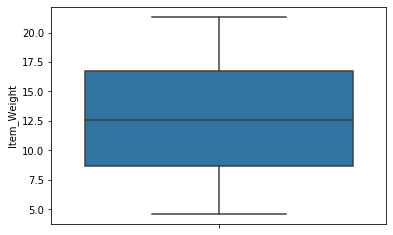

In [17]:
sns.boxplot(y = "Item_Weight",data = df)

In [18]:
df["Item_Weight"] = np.where(df["Item_Weight"].isnull(),
                             np.mean(df["Item_Weight"]),df["Item_Weight"])

In [19]:
df["Item_Weight"].isnull().sum()

0

In [20]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [21]:
df["Item_Fat_Content"] = np.where(df["Item_Fat_Content"].isin(["LF",'low fat']),
                                 "Low Fat",df["Item_Fat_Content"])
df["Item_Fat_Content"] = np.where(df["Item_Fat_Content"] == "reg",
                                 "Regular",df["Item_Fat_Content"])
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [22]:
df["Outlet_Establishment_Year"].value_counts(dropna = False)

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

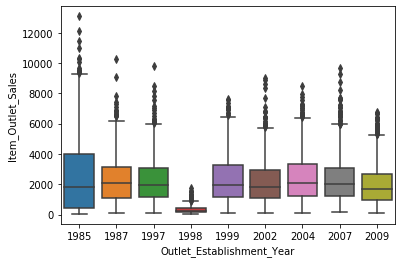

In [23]:
sns.boxplot(x = "Outlet_Establishment_Year",y = "Item_Outlet_Sales",data = df)

In [24]:
df["Outlet_Establishment_Year"] = np.where(df["Outlet_Establishment_Year"].isin([1987,1997,1999,2002,2004,2007,2009]),
                                          "Medium Sales years",df["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"] = np.where(df["Outlet_Establishment_Year"] == "1985",
                                          "High Sale year",df["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"] = np.where(df["Outlet_Establishment_Year"] == "1998",
                                          "Low Sale year",df["Outlet_Establishment_Year"])
df["Outlet_Establishment_Year"].value_counts(dropna = False)

Medium Sales years    10840
High Sale year         2439
Low Sale year           925
Name: Outlet_Establishment_Year, dtype: int64

In [25]:
df["Outlet_Size"].value_counts(dropna = False)

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [26]:
df["Outlet_Size"] = np.where(df["Outlet_Size"].isnull(),"Unknown",
                             df["Outlet_Size"])
df["Outlet_Size"].value_counts(dropna = False)

Medium     4655
Unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [27]:
df["Outlet_Location_Type"].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [28]:
df["Outlet_Type"].value_counts(dropna = False)

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

# Dummy creation

In [29]:
cat_cols = df.select_dtypes('object').columns
cat_cols = cat_cols[:-1]
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [30]:
df = pd.get_dummies(df,columns=cat_cols,drop_first=True,prefix=cat_cols)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,data,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Establishment_Year_Low Sale year,Outlet_Establishment_Year_Medium Sales years,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,train,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,train,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,train,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,train,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,train,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [31]:
train_df = df.loc[df['data'] == "train"]
test_df = df.loc[df['data'] == "test"]

In [32]:
train_df.shape,test_df.shape

((8523, 40), (5681, 40))

In [33]:
del train_df["data"]
test_df.drop(["data","Item_Outlet_Sales"],inplace = True,axis = 1)

C:\Users\skeva\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
train_df.shape,test_df.shape

((8523, 39), (5681, 38))

In [35]:
X = train_df.drop(["Item_Outlet_Sales"],axis = 1)
Y = train_df["Item_Outlet_Sales"]

In [36]:
X.shape,Y.shape

((8523, 38), (8523,))

In [37]:
from sklearn.model_selection import train_test_split
train_train,train_test = train_test_split(train_df,test_size = 0.2)

In [38]:
train_train.shape,train_test.shape

((6818, 39), (1705, 39))

In [39]:
x_train = train_train.drop(["Item_Outlet_Sales"],axis = 1)
y_train = train_train["Item_Outlet_Sales"]
x_test = train_test.drop(["Item_Outlet_Sales"],axis = 1)
y_test = train_test["Item_Outlet_Sales"]

In [40]:
from sklearn.linear_model import LinearRegression
lgr = LinearRegression(fit_intercept=True)
lgr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
result = pd.DataFrame({"Actual":y_test})
result.head()

,Actual
5778,2559.3352
3010,4762.4674
1238,3559.3668
6166,406.1380
5419,866.8716


In [42]:
result["Predicted"] = lgr.predict(x_test)
result.head(10)

,Actual,Predicted
5778,2559.3352,1380.584834
3010,4762.4674,3429.082410
1238,3559.3668,3098.732586
6166,406.1380,840.330055
5419,866.8716,2269.398827
584,3817.0314,2834.430147
4216,1747.0592,3528.902079
8494,1637.8680,1832.850905
7700,970.7364,1840.205020
1786,2243.7460,3679.751368


In [43]:
result["Error"] = result["Actual"]-result["Predicted"]

In [44]:
rmse = (np.mean((result["Error"])**2))**0.5
rmse

1168.8804940591117

In [45]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN


In [46]:
lgr.fit(X,Y)
submission["Item_Outlet_Sales"] = lgr.predict(test_df)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1835.760915
1,FDW14,OUT017,1531.502963
2,NCN55,OUT010,1881.660250
3,FDQ58,OUT017,2581.679050
4,FDY38,OUT027,5136.570872


In [47]:
submission.to_csv("My_Submission.csv",index= False)

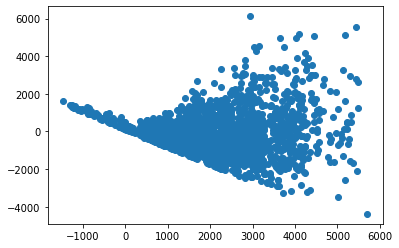

In [48]:
plt.scatter(result["Predicted"],result["Error"])

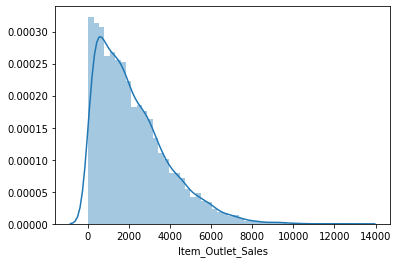

In [49]:
sns.distplot(train_df["Item_Outlet_Sales"])

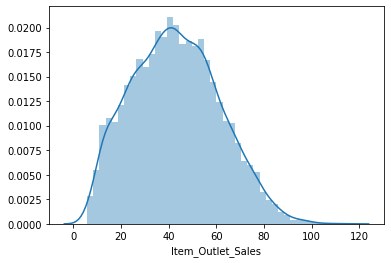

In [50]:
sns.distplot((train_df["Item_Outlet_Sales"])**0.5)

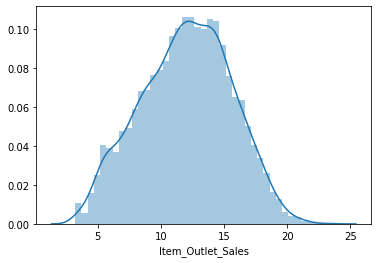

In [53]:
sns.distplot((train_df["Item_Outlet_Sales"])**(1/3))

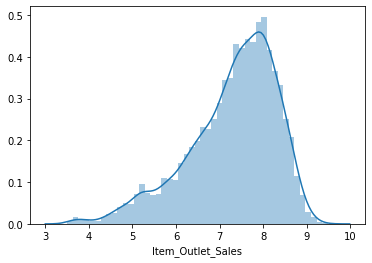

In [54]:
sns.distplot(np.log(train_df["Item_Outlet_Sales"]))

In [55]:
lgr.fit(x_train,np.sqrt(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
result["pred_square"] = (lgr.predict(x_test))**2

In [58]:
result["Error_square"] = result["Actual"]-result["pred_square"]
result.head()

,Actual,Predicted,Error,pred_square,Error_square
5778,2559.3352,1380.584834,1178.750366,1271.490975,1287.844225
3010,4762.4674,3429.082410,1333.384990,3329.205418,1433.261982
1238,3559.3668,3098.732586,460.634214,2901.009134,658.357666
6166,406.1380,840.330055,-434.192055,893.071400,-486.933400
5419,866.8716,2269.398827,-1402.527227,2046.470778,-1179.599178


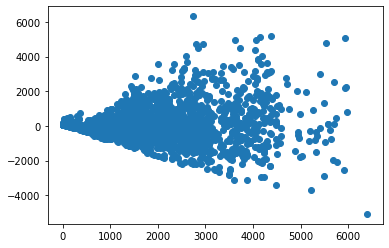

In [59]:
plt.scatter(result["pred_square"],result["Error_square"])

In [60]:
rmse_sqrt = (np.mean((result["Error_square"])**2))**0.5
rmse_sqrt

1140.6752830501293

In [61]:
lgr.fit(X,np.sqrt(Y))
submission["Item_Outlet_Sales"] = (lgr.predict(test_df))**2
submission.to_csv("My Submission.csv",index = False)

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [63]:
lgr.fit(x_train_poly,y_train)
result["pred_poly"] = lgr.predict(x_test_poly)
result["Error_poly"] = result["Actual"] - result["pred_poly"]
result.head()

,Actual,Predicted,Error,pred_square,Error_square,pred_poly,Error_poly
5778,2559.3352,1380.584834,1178.750366,1271.490975,1287.844225,1551.829334,1007.505866
3010,4762.4674,3429.082410,1333.384990,3329.205418,1433.261982,3879.663799,882.803601
1238,3559.3668,3098.732586,460.634214,2901.009134,658.357666,3096.656360,462.710440
6166,406.1380,840.330055,-434.192055,893.071400,-486.933400,498.741088,-92.603088
5419,866.8716,2269.398827,-1402.527227,2046.470778,-1179.599178,2091.383411,-1224.511811


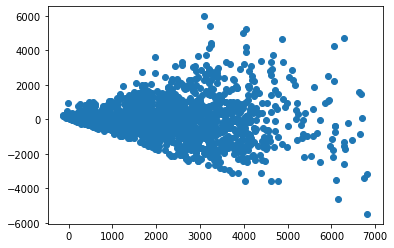

In [64]:
plt.scatter(result["pred_poly"],result["Error_poly"])

In [65]:
rmse_poly = np.sqrt(np.mean((result["Error_poly"])**2))
rmse_poly

1129.3580807449514